In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"train\train.csv")
test = pd.read_csv(r"test\test.csv")

In [3]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
count_table = train.label.value_counts()
#count_table = count_table.reset_index().sort_values(by='index')

In [6]:
count_table

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
count_table = count_table.reset_index().sort_values(by='index')

In [8]:
count_table

,index,label
6,0,4132
0,1,4684
4,2,4177
2,3,4351
7,4,4072
9,5,3795
5,6,4137
1,7,4401
8,8,4063
3,9,4188


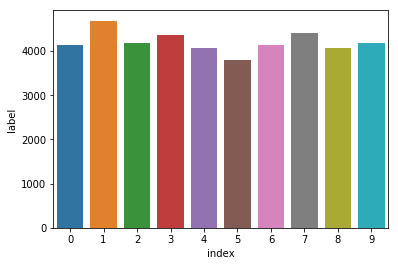

In [9]:
sns.barplot(x='index', y='label', data=count_table)

In [10]:
X = train.drop("label", axis = 1)
y = train['label']

In [11]:
y.head(3)

0    1
1    0
2    1
Name: label, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')

In [14]:
svclassifier.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred = svclassifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_test, y_pred), "\n")

accuracy 0.9584761904761905 



In [25]:
from sklearn.preprocessing import scale
test = scale(test)

In [26]:
test_pred = svclassifier.predict(test)

In [27]:
test_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [28]:
output = pd.DataFrame({"ImageId": i+1 , "Label": test_pred[i]} for i in range(0, test.shape[0]))

In [29]:
output.to_csv('MNISTSVM.csv', index=False)